In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
import sys

sys.path.append("../src")

In [14]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features


random_state_for_sites = {'Foliage':800, 'Carp':0, 'Central':0, 'Telephone':0}
color_for_groups = {0: 'blue', 1: 'red', 2:'limegreen'}
label_for_groups = {0: 'LF1', 1: 'HF1', 2:'HF2'}

NUM_CLUSTERS = 2

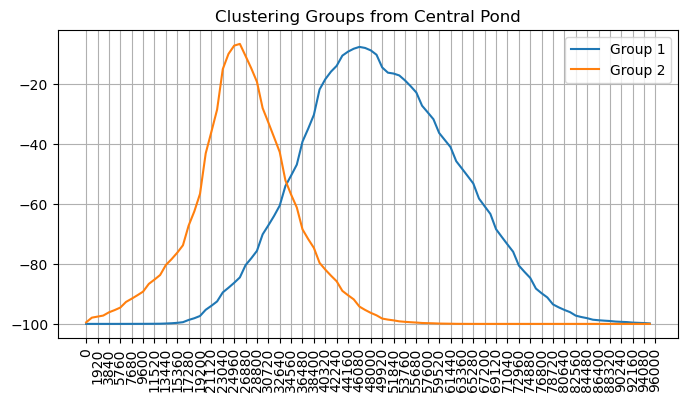

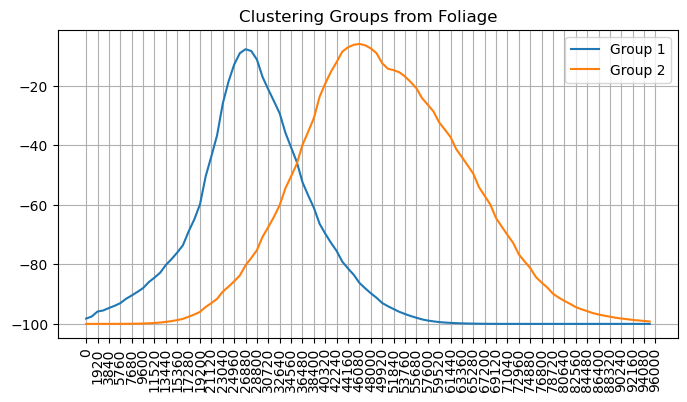

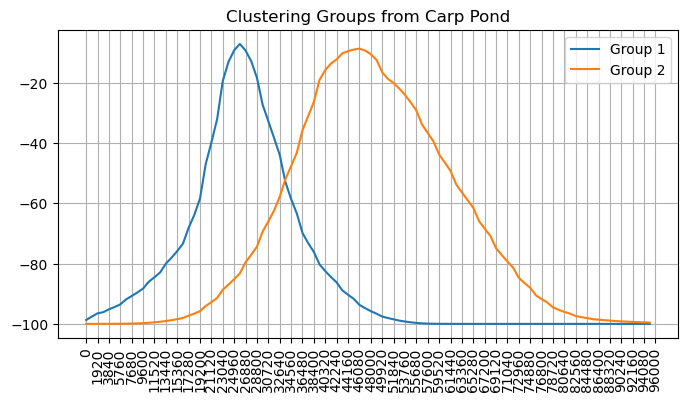

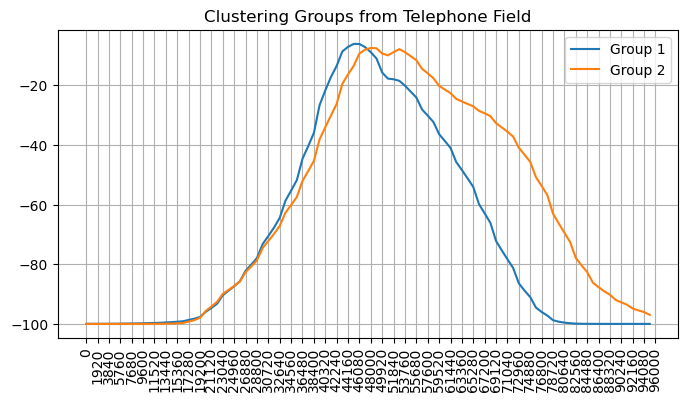

In [15]:
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    input_file_type = 'top1_inbouts_call_signals'
    if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
        output_dir = Path(f'../data/generated_welch/{site_key}')
        if not(output_dir.is_dir()):
            output_dir.mkdir(parents=True)
        output_file_type = 'top1_inbouts_welch_signals'

        location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index_in_file'] = location_calls_sampled['index']
        location_calls_sampled['index'] = location_calls_sampled.index

        snr_thresh = 10
        good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
        good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
        good_snr_location_calls_sampled

        welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
        welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
        welch_data.index.name = 'Call #'
        welch_data.columns.name = 'Frequency (kHz)'
        welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

        welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)
        
        kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10).fit(welch_data)
        plt.figure(figsize=(8, 4))
        plt.title(f'Clustering Groups from {SITE_NAMES[site_key]}')
        for i in range(NUM_CLUSTERS):
            plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}')
        plt.xticks(np.linspace(0, welch_signals.shape[1], 51), np.linspace(0, 96000, 51, dtype=int), rotation=90)
        plt.grid(which='both')
        plt.legend()
        plt.show()

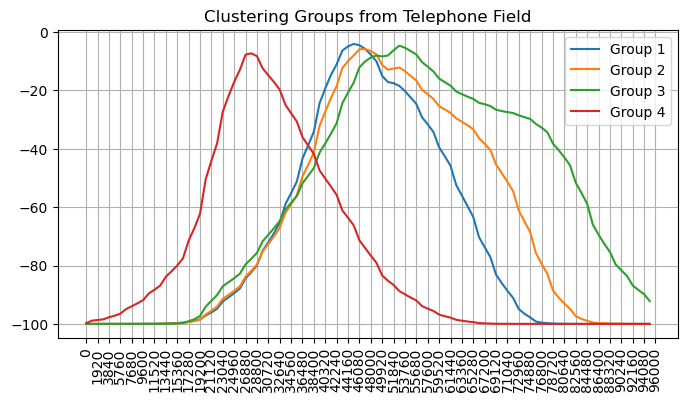

In [12]:
site_key = 'Telephone'
input_dir = Path(f'../data/detected_calls/{site_key}')
input_file_type = 'top1_inbouts_call_signals'
if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
    output_dir = Path(f'../data/generated_welch/{site_key}')
    if not(output_dir.is_dir()):
        output_dir.mkdir(parents=True)
    output_file_type = 'top1_inbouts_welch_signals'

    location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
    location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
    location_calls_sampled['index_in_file'] = location_calls_sampled['index']
    location_calls_sampled['index'] = location_calls_sampled.index

    snr_thresh = 10
    good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
    good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
    good_snr_location_calls_sampled

    welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
    welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
    welch_data.index.name = 'Call #'
    welch_data.columns.name = 'Frequency (kHz)'
    welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

    welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)
    NUM_CLUSTERS = 4
    kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10).fit(welch_data)
    plt.figure(figsize=(8, 4))
    plt.title(f'Clustering Groups from {SITE_NAMES[site_key]}')
    for i in range(NUM_CLUSTERS):
        plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}')
    plt.xticks(np.linspace(0, welch_signals.shape[1], 51), np.linspace(0, 96000, 51, dtype=int), rotation=90)
    plt.grid(which='both')
    plt.legend()
    plt.show()

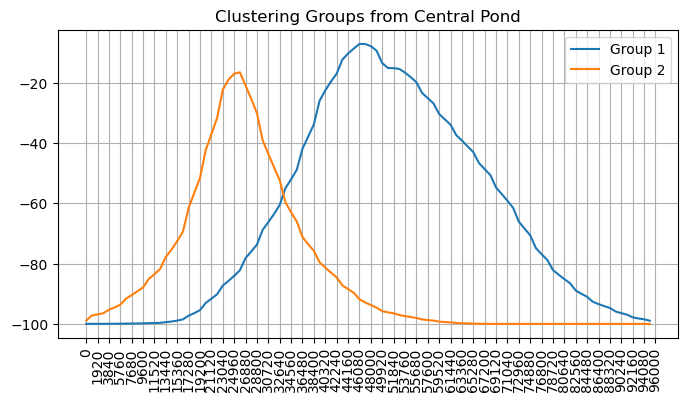

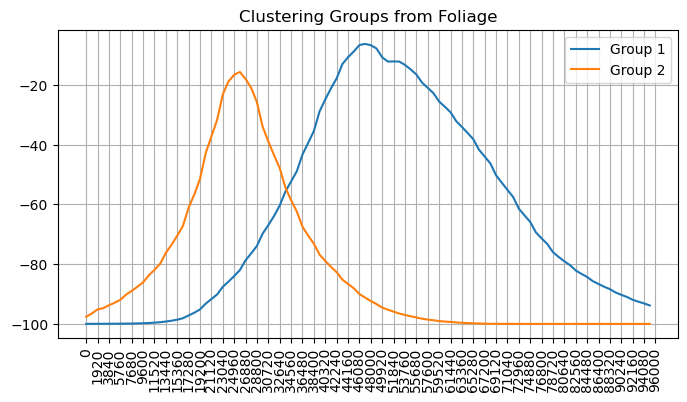

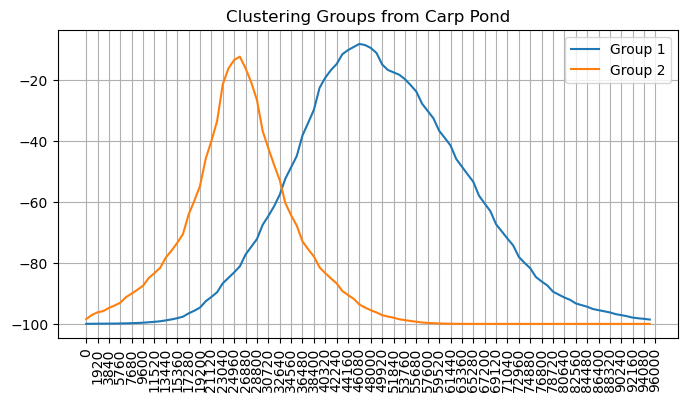

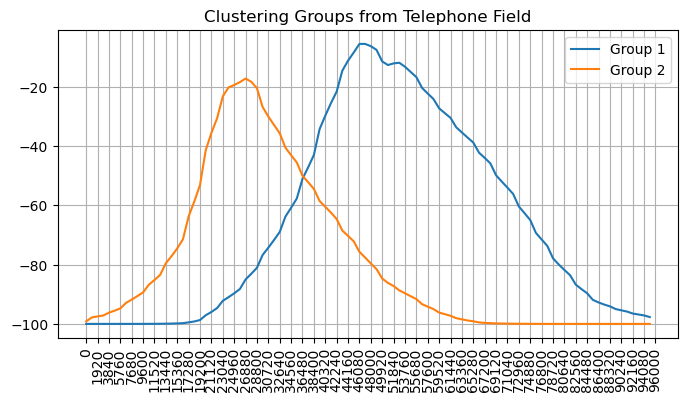

In [16]:
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    input_file_type = 'top1_infile_call_signals'
    if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
        output_dir = Path(f'../data/generated_welch/{site_key}')
        if not(output_dir.is_dir()):
            output_dir.mkdir(parents=True)
        output_file_type = 'top1_infile_welch_signals'

        location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index_in_file'] = location_calls_sampled['index']
        location_calls_sampled['index'] = location_calls_sampled.index

        snr_thresh = 10
        good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
        good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
        good_snr_location_calls_sampled

        welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
        welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
        welch_data.index.name = 'Call #'
        welch_data.columns.name = 'Frequency (kHz)'
        welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

        welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)
        
        kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
        plt.figure(figsize=(8, 4))
        plt.title(f'Clustering Groups from {SITE_NAMES[site_key]}')
        for i in range(NUM_CLUSTERS):
            plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}')
        plt.xticks(np.linspace(0, welch_signals.shape[1], 51), np.linspace(0, 96000, 51, dtype=int), rotation=90)
        plt.grid(which='both')
        plt.legend()
        plt.show()

In [17]:
bouts_welch_signals_all_locs = []
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    input_file_type = 'top1_inbouts_call_signals'
    if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
        output_dir = Path(f'../data/generated_welch/{site_key}')
        if not(output_dir.is_dir()):
            output_dir.mkdir(parents=True)
        output_file_type = 'top1_inbouts_welch_signals'

        location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index_in_file'] = location_calls_sampled['index']
        location_calls_sampled['index'] = location_calls_sampled.index

        snr_thresh = 10
        good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
        good_snr_location_calls_sampled.reset_index(drop=True, inplace=True)
        good_snr_location_calls_sampled

        welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)
        bouts_welch_signals_all_locs.append(welch_signals)

bouts_welch_signals_all_locs = np.vstack(bouts_welch_signals_all_locs)
welch_data = pd.DataFrame(bouts_welch_signals_all_locs, columns=np.linspace(0, 96000, bouts_welch_signals_all_locs.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'

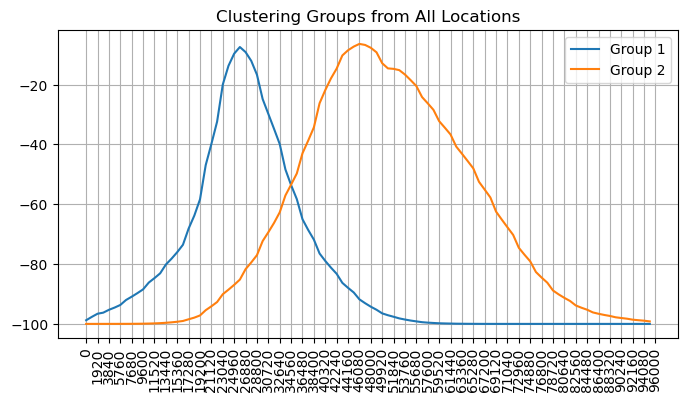

In [18]:
kmean_welch = KMeans(n_clusters=NUM_CLUSTERS, n_init=10).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from All Locations')
for i in range(NUM_CLUSTERS):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}')
plt.xticks(np.linspace(0, welch_signals.shape[1], 51), np.linspace(0, 96000, 51, dtype=int), rotation=90)
plt.grid(which='both')
plt.legend()
plt.show()